In [12]:
import pandas as pd


In [41]:
trader=pd.read_csv("historical_data.csv")
sentiment=pd.read_csv("fear_greed_index.csv")

In [42]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [43]:
trader.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [44]:

trader['Timestamp'] = pd.to_datetime(trader['Timestamp'], unit='ms')
trader['date'] = trader['Timestamp'].dt.strftime('%Y-%m-%d')

In [45]:
print(sentiment['date'].head())

0    2018-02-01
1    2018-02-02
2    2018-02-03
3    2018-02-04
4    2018-02-05
Name: date, dtype: object


In [46]:
merged = pd.merge(trader, sentiment, on='date', how='left')

In [47]:
print(merged[['date', 'classification', 'Closed PnL']].head())

         date classification  Closed PnL
0  2024-10-27          Greed         0.0
1  2024-10-27          Greed         0.0
2  2024-10-27          Greed         0.0
3  2024-10-27          Greed         0.0
4  2024-10-27          Greed         0.0


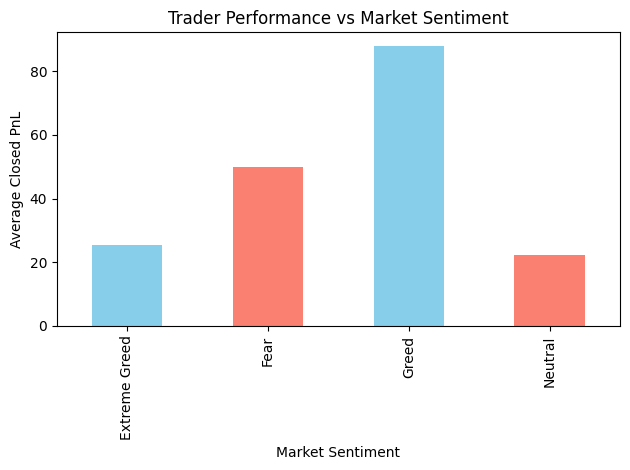

In [48]:
import matplotlib.pyplot as plt

merged.groupby('classification')['Closed PnL'].mean().plot(
    kind='bar',
    color=['skyblue', 'salmon'],
    title='Trader Performance vs Market Sentiment'
)

plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.tight_layout()
plt.show()


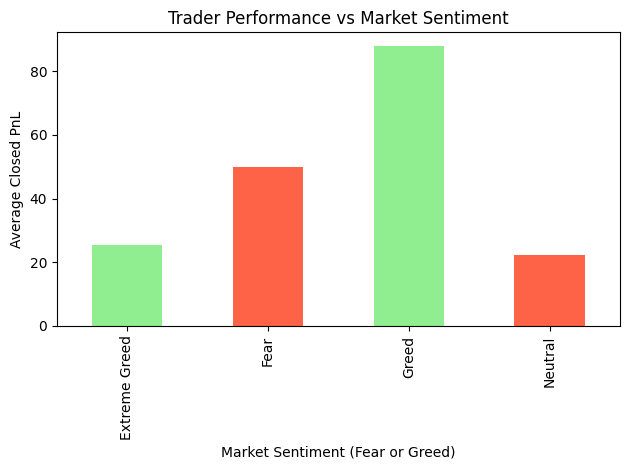

In [49]:
import matplotlib.pyplot as plt

avg_pnl = merged.groupby('classification')['Closed PnL'].mean()
avg_pnl.plot(kind='bar', color=['lightgreen', 'tomato'])

plt.title("Trader Performance vs Market Sentiment")
plt.xlabel("Market Sentiment (Fear or Greed)")
plt.ylabel("Average Closed PnL")
plt.tight_layout()
plt.show()

In [50]:
merged['classification'].value_counts()

classification
Fear             133871
Greed             36289
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64

In [52]:
print(merged.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')


In [53]:
merged.groupby('classification')['Size Tokens'].mean()

classification
Extreme Greed    48736.443323
Fear              3071.523165
Greed             2232.117751
Neutral           1967.302964
Name: Size Tokens, dtype: float64

In [54]:
avg_size = merged.groupby('classification')['Size Tokens'].mean()
print(avg_size)

classification
Extreme Greed    48736.443323
Fear              3071.523165
Greed             2232.117751
Neutral           1967.302964
Name: Size Tokens, dtype: float64


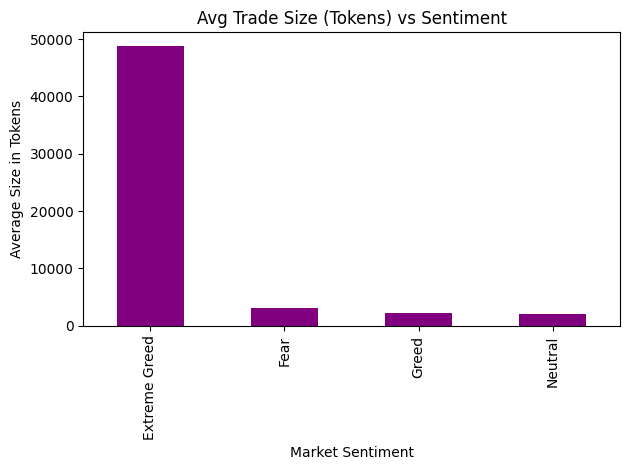

In [55]:
avg_size.plot(kind='bar', color='purple', title='Avg Trade Size (Tokens) vs Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Size in Tokens')
plt.tight_layout()
plt.show()